# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [442]:
import pandas as pd

In [443]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [444]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```

#### Data Cleaning and Preparation
Based on the feature descriptions, the following steps are needed to prepare the data for modeling:
- The target variable `y` will be renamed to `target` for clarity.
- The `target` column will be converted from 'yes'/'no' to binary (1/0).
- The `pdays` column, which uses 999 to signify a client was not previously contacted, will be converted into a binary feature indicating previous contact.
- All columns with the `object` data type (e.g., `job`, `marital`, `education`, etc.) will be converted into numerical format using one-hot encoding.
- The `duration` column will be dropped, as it is not a realistic predictor (it's not known before a call is made).

In [445]:
import numpy as np

# Rename 'y' to 'target'
df.rename(columns={'y': 'target'}, inplace=True)

# Convert 'target' to binary
df['target'] = df['target'].map({'yes': 1, 'no': 0})

# Convert 'pdays' to a binary feature
df['pdays'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)

# Drop the 'duration' column
df.drop('duration', axis=1, inplace=True)

# One-hot encode all object-type columns
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Data after cleaning and encoding:")
df.head()


Data after cleaning and encoding:


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False
1,57,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False
2,37,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False
3,40,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False
4,56,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False


#### Exploratory Data Analysis (EDA)
Now that the data is cleaned, let's visualize some of the features.

In [446]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

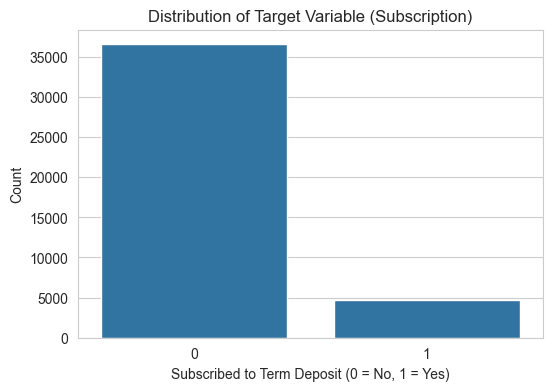

In [447]:

# 1. Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable (Subscription)')
plt.xlabel('Subscribed to Term Deposit (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

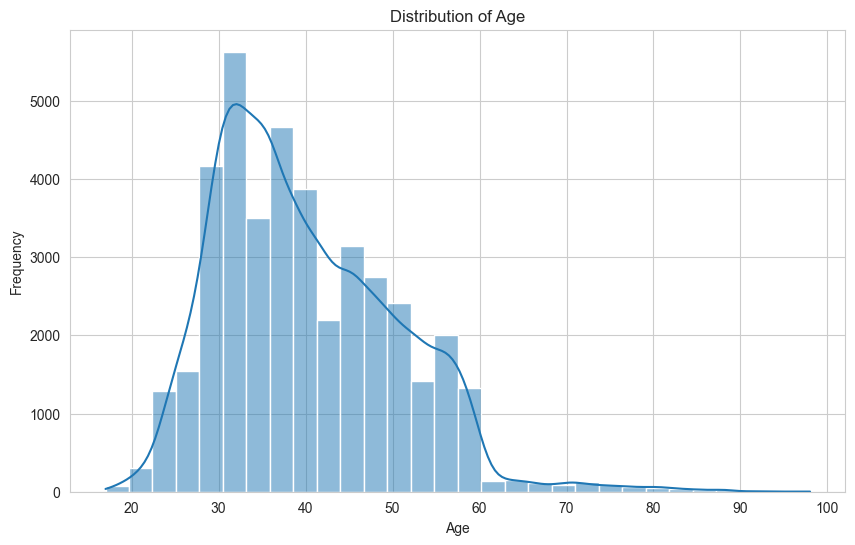

In [448]:

# 2. Visualize the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

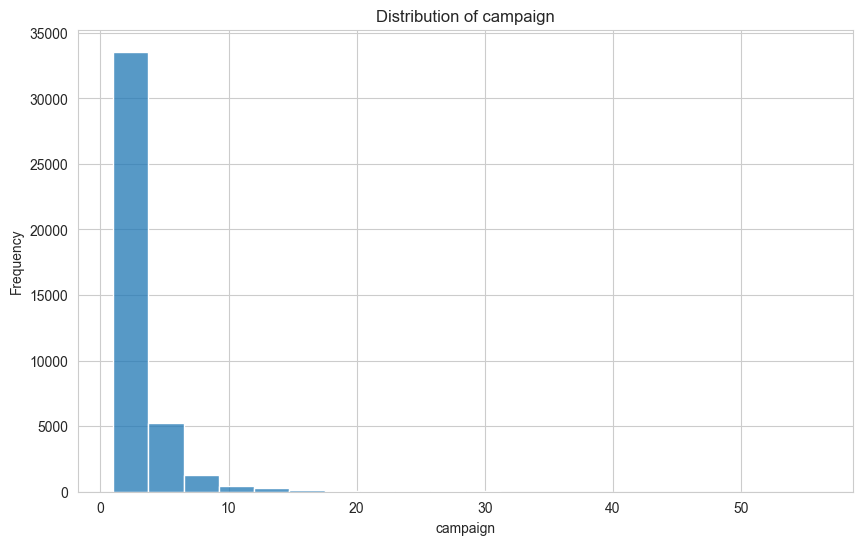

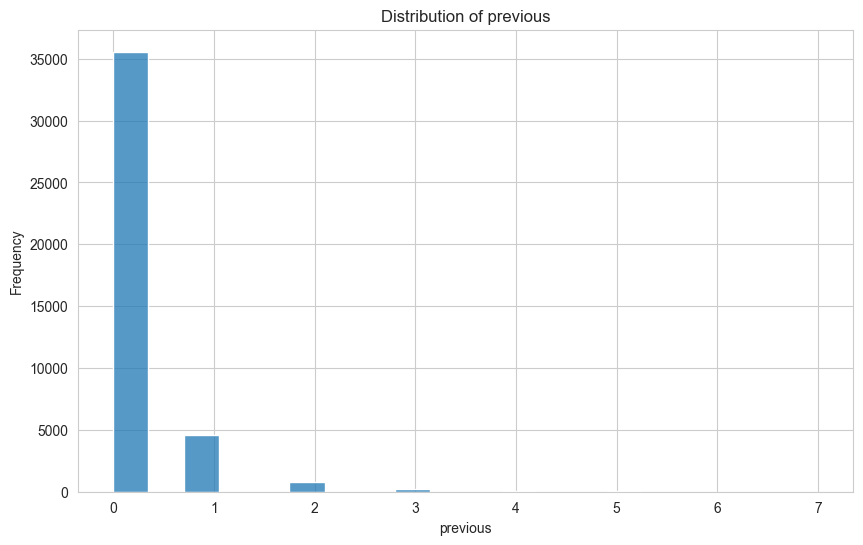

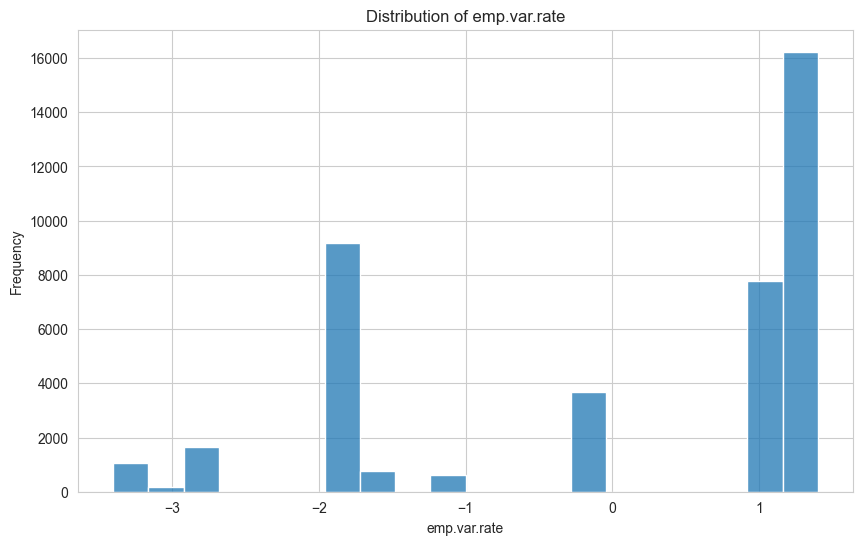

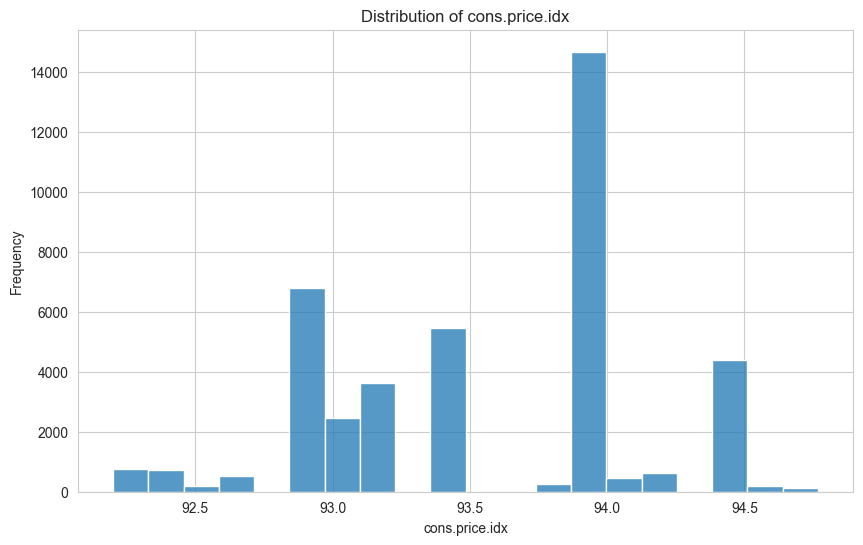

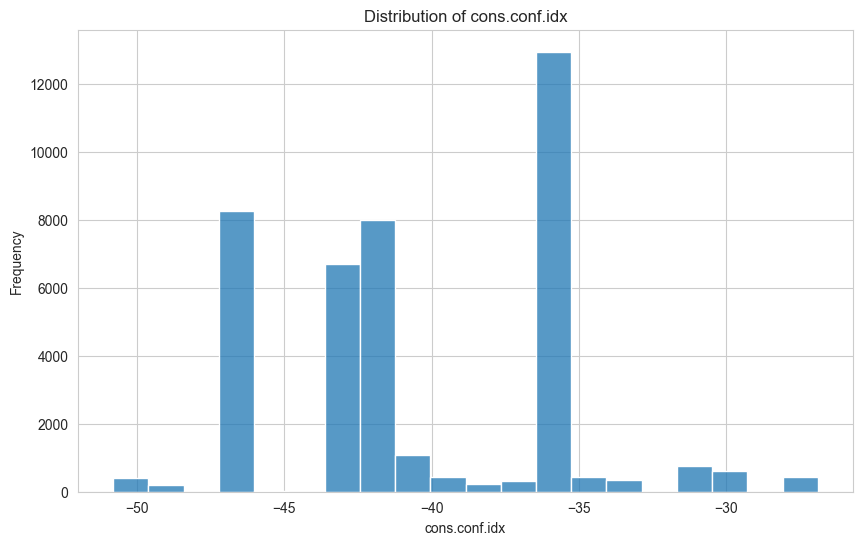

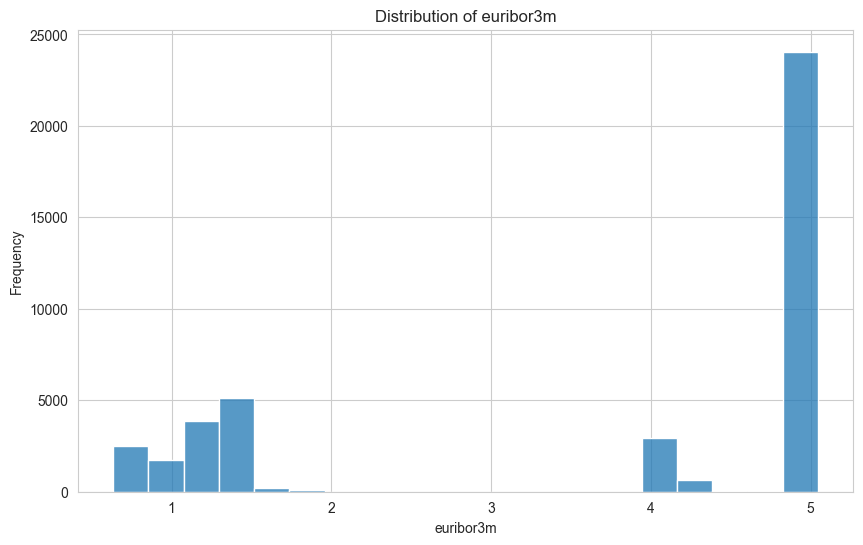

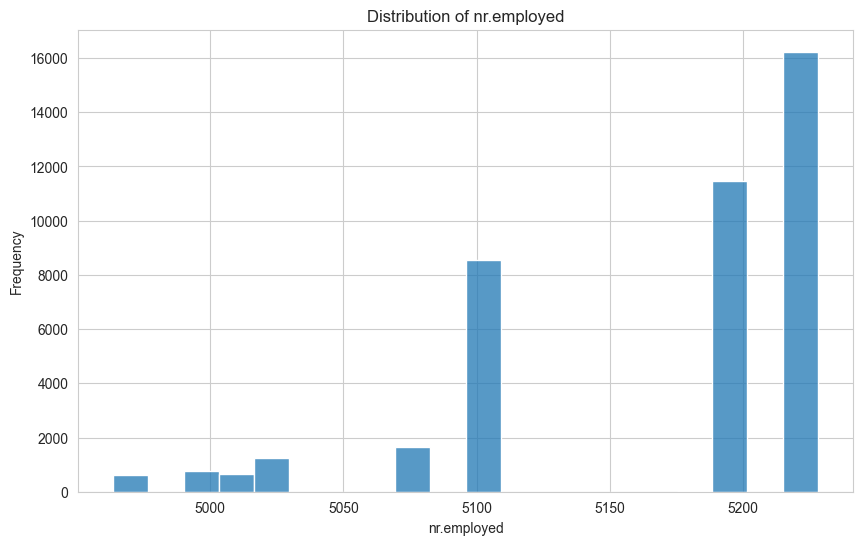

In [449]:

# 3. Visualize other numerical features
numerical_features = ['campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=20, kde=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

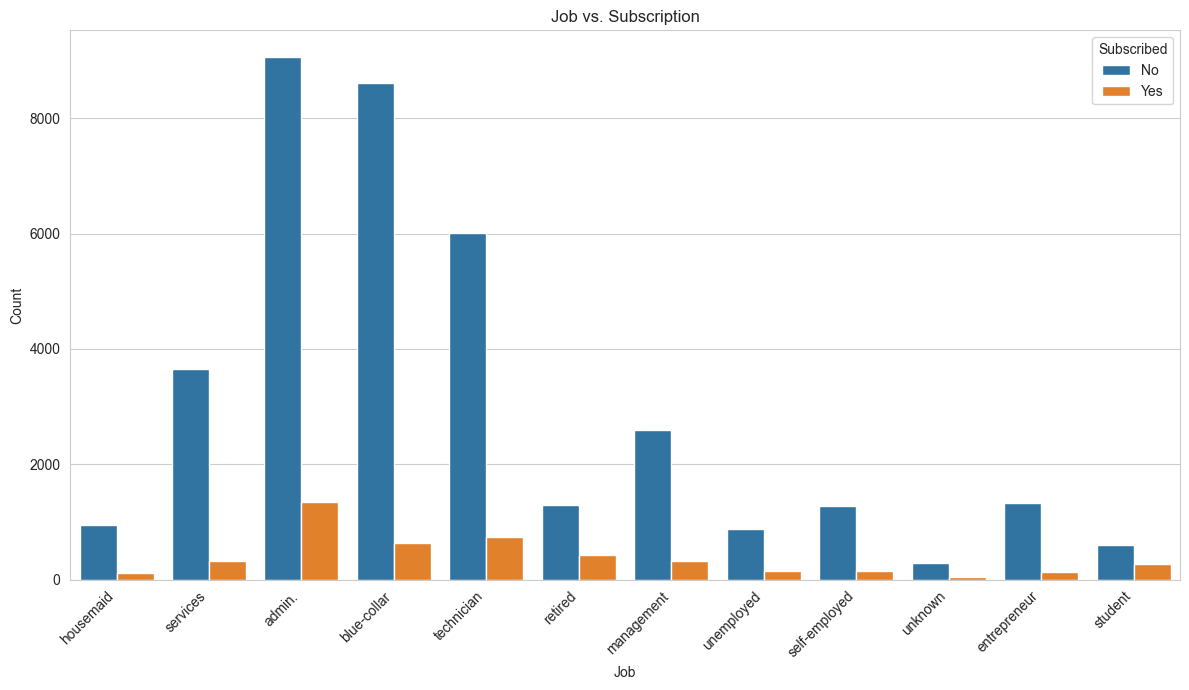

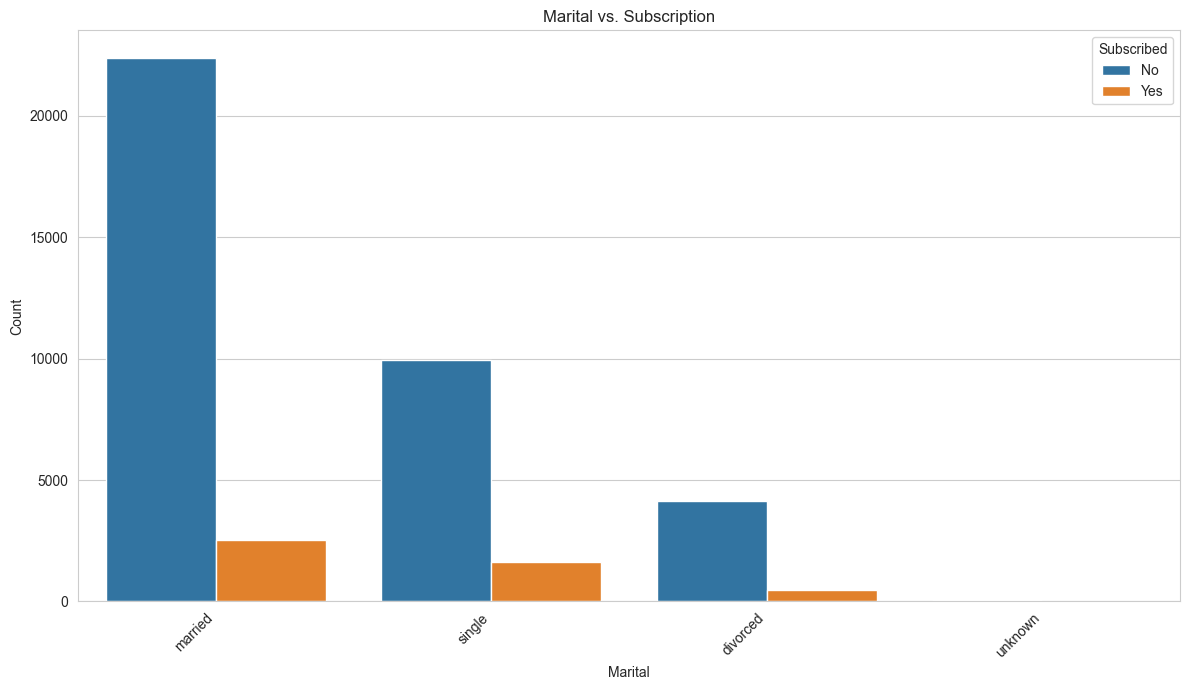

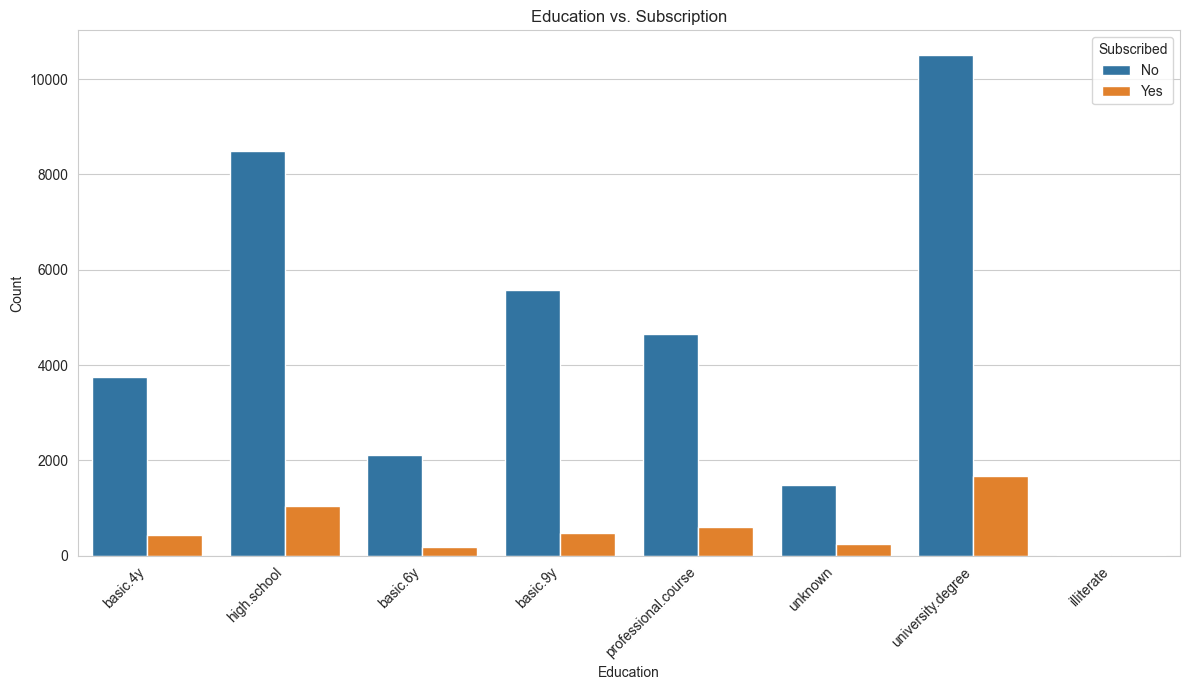

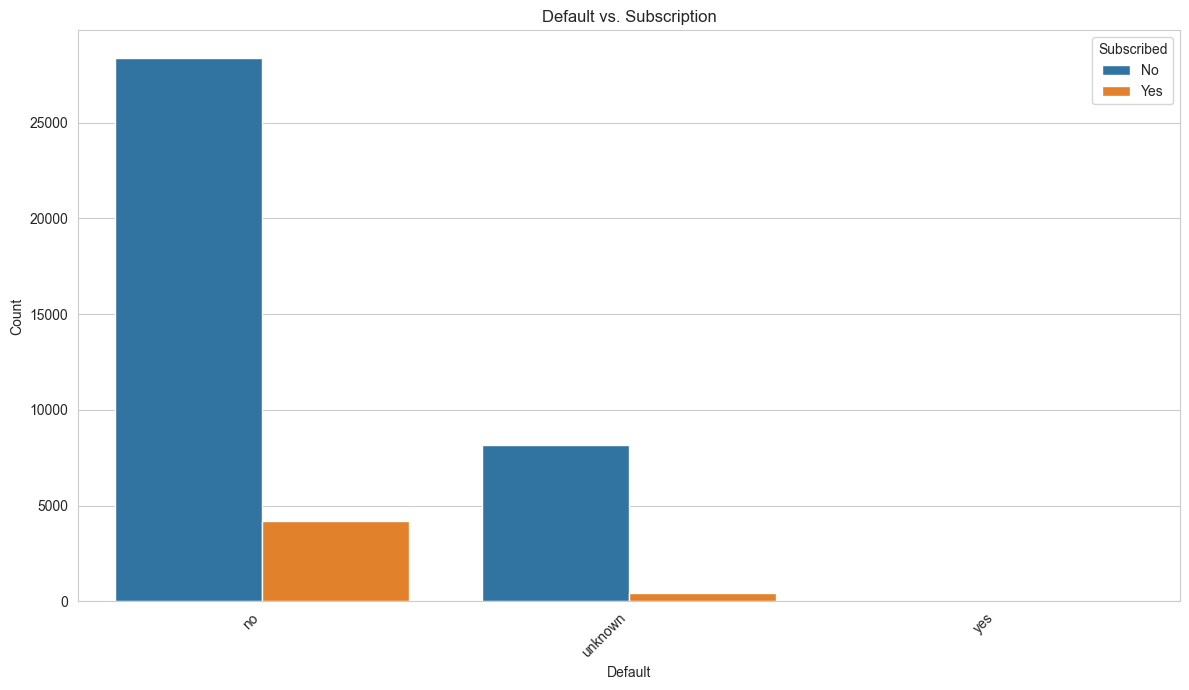

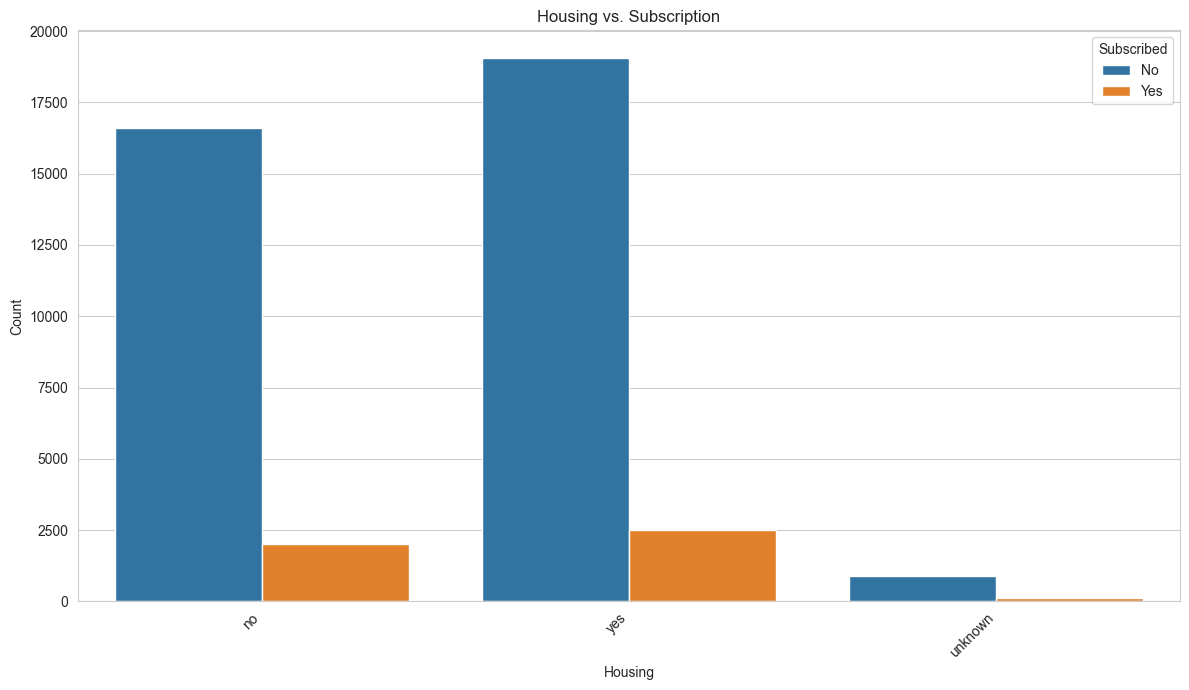

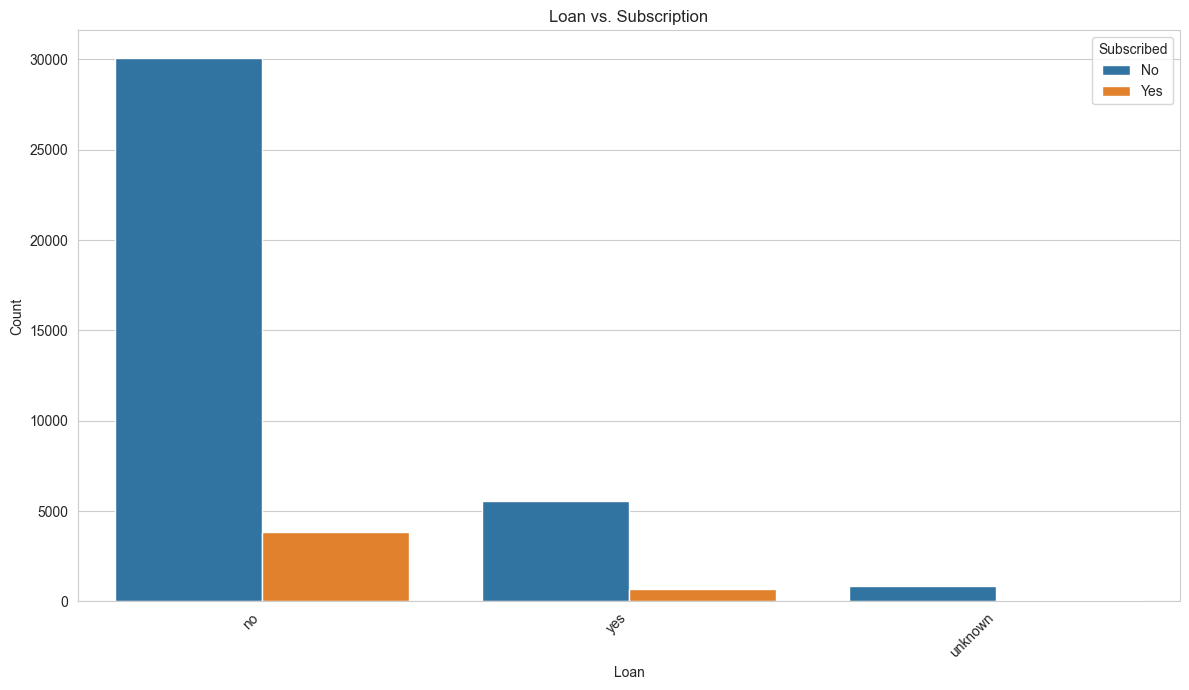

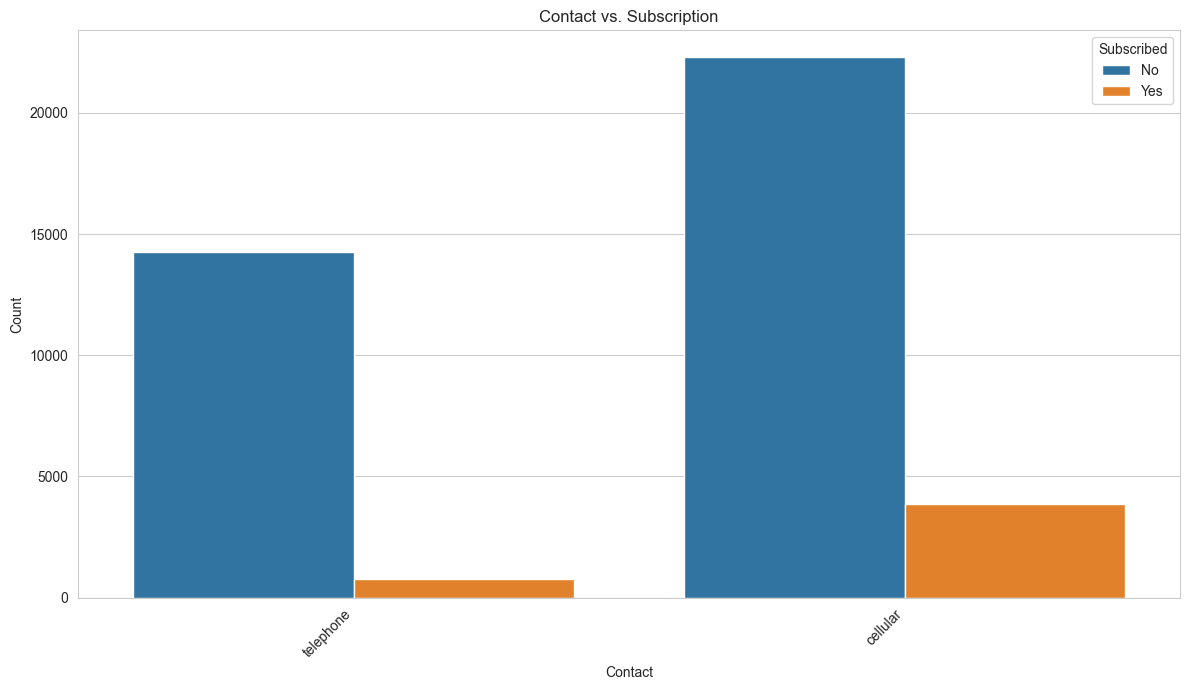

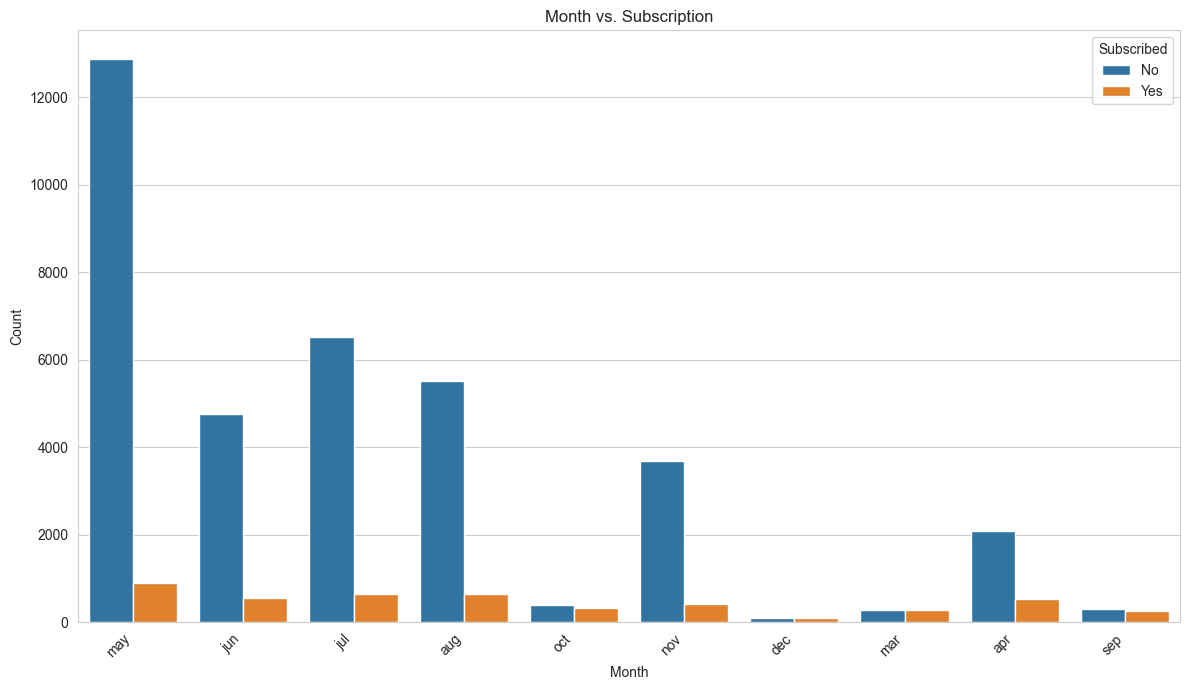

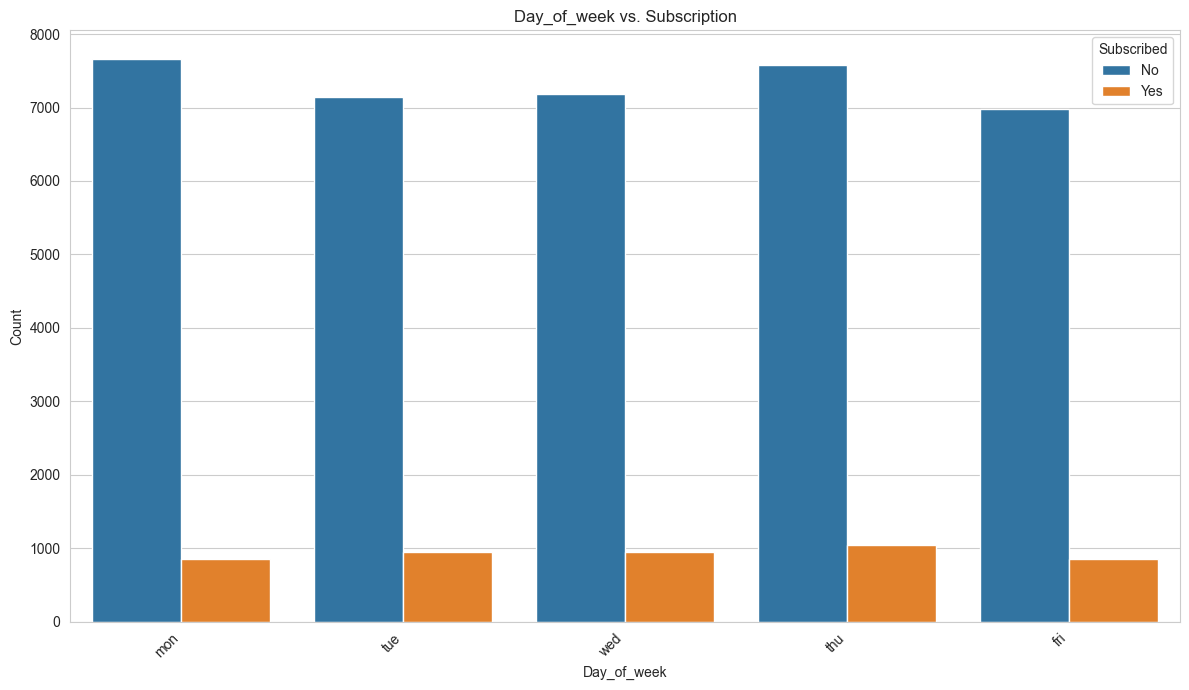

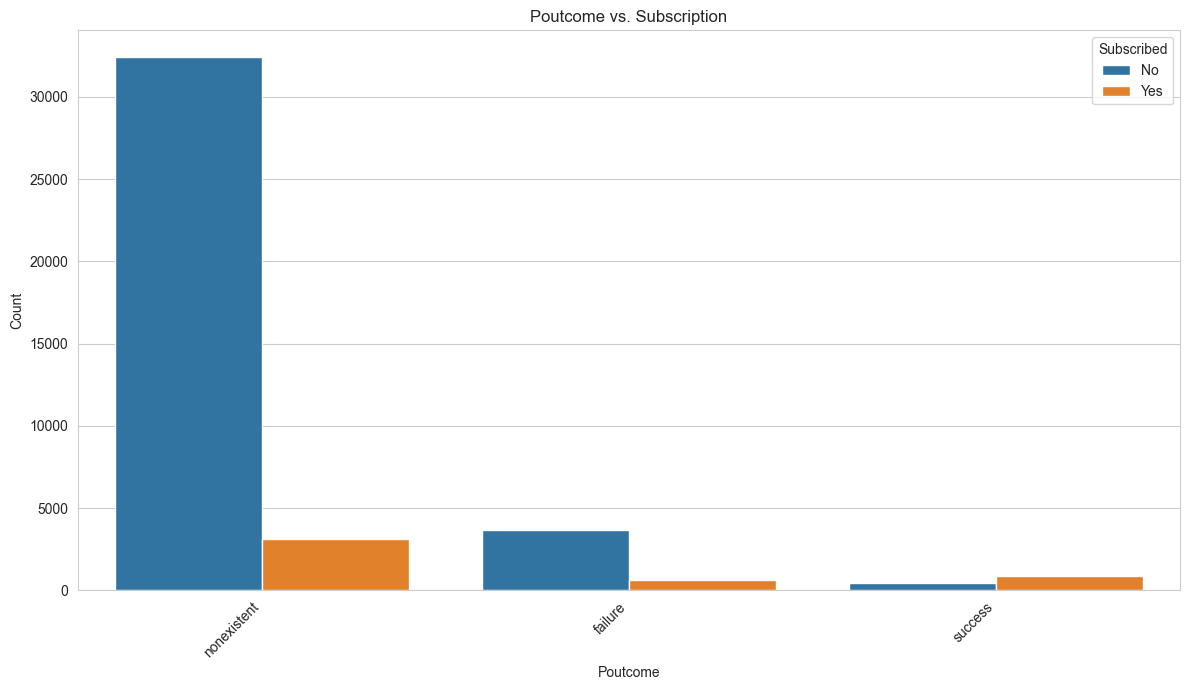

In [450]:

# 4. Visualize categorical features vs. target
# We need to read the original data again to get the original categorical columns for better visualization
df_orig = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')
df_orig.rename(columns={'y': 'target'}, inplace=True)

original_categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for feature in original_categorical:
    plt.figure(figsize=(12, 7))
    sns.countplot(x=feature, hue='target', data=df_orig)
    plt.title(f'{feature.capitalize()} vs. Subscription')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Subscribed', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()


### Summary of EDA Insights
The exploratory data analysis provides a detailed picture of the factors influencing term deposit subscriptions. A thorough review of all visualizations reveals the following key insights:

***Core Issue: Target Variable Imbalance***: The dataset is highly imbalanced, with approximately 88.7% of clients not subscribing. This establishes a high baseline accuracy that any useful model must surpass. More importantly, it means that overall accuracy is a poor metric, and we must focus on the model's ability to correctly identify the small number of positive cases (subscribers).

***Client Demographics & Financial Profile:***

- ***Age:*** The bulk of marketing efforts are directed at clients aged 30-50. However, the highest subscription rates are seen at the extremes of the age spectrum: clients under 20 (likely students) and over 60 (likely retired).
- ***Job & Education:*** While 'admin.' and 'blue-collar' workers with 'university.degree' or 'high.school' education are the most common targets, the best response comes from 'students' and 'retired' individuals. This suggests that a client's current life stage is a powerful predictor.
- ***Marital Status:*** Married clients are the largest group contacted, but 'single' clients show a proportionally higher rate of subscription.
- ***Existing Loans (Housing & Personal)***: Clients without existing housing or personal loans are slightly more likely to subscribe. This suggests that individuals with fewer financial liabilities are more receptive to opening a term deposit.
- ***Credit in Default:*** Almost no clients with credit in default were contacted, making this feature less informative.

***Campaign Strategy & Timing:***

- ***Contact Method:*** 'Cellular' contact is significantly more effective than 'telephone', yielding a much higher subscription rate.
- ***Seasonality (Month):*** Campaign success is highly seasonal. The highest subscription rates occur in March, September, October, and December. Conversely, May has the highest volume of calls but one of the lowest success rates, indicating a significant misallocation of resources.
- ***Day of the Week:*** The subscription rate is fairly stable across the week, with slightly higher engagement from Monday to Thursday. There is no strong evidence to suggest focusing on a particular day.
- ***Campaign Intensity:*** Most clients are contacted only once or twice. The histograms show that the number of subscriptions drops sharply as the number of contacts (campaign) increases, indicating that repeated calls to the same client yield diminishing returns.

***Historical Context & Economic Environment:***

- ***Previous Campaign Outcome (poutcome):*** This is one of the strongest predictors. Clients who subscribed in a previous campaign ('success') are overwhelmingly likely to subscribe again. This highlights the immense value of re-engaging with past successful leads.
- ***Socio-Economic Indicators:*** These metrics clearly correlate with subscription rates. Subscriptions are higher when:
emp.var.rate (employment variation) and euribor3m (interbank rate) are low.
cons.conf.idx (consumer confidence index) is high. This indicates that clients are more likely to invest when the economic outlook is positive and stable.

***Actionable Conclusion from EDA:***
 - The ideal target for a campaign is a student or retiree who has subscribed before, does not have outstanding personal/housing loans, and is contacted via cellular phone in months like March or September, particularly when consumer confidence is high and interest rates are low. Focusing efforts on this profile could significantly improve campaign efficiency over the current strategy.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Business Objective

1. To enhance the efficiency and effectiveness of the bank's direct marketing campaigns.
2. The goal is to build a predictive model that can accurately identify which clients have the highest likelihood of subscribing to a term deposit.
3. By focusing marketing resources on these high-probability leads, the bank can optimize its campaign strategy, leading to:
- ***Increased Conversion Rates***: By targeting the right customers, the bank can improve the ratio of subscriptions to calls.
- ***Reduced Costs***: Concentrating efforts on promising leads avoids wasting time and resources on clients who are unlikely to convert.
- ***Maximized Return on Investment (ROI)***: A more efficient campaign directly translates to a better financial return for the marketing expenditure.

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   target                         41188 non-null  int64  
 10  job_blue-collar                41188 non-null  bool   
 11  job_entrepreneur               41188 non-null  bool   
 12  job_housemaid                  41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [452]:
# Select only the "bank client data" features for the initial model
bank_client_features = ['age'] + [col for col in df.columns if any(col.startswith(prefix) for prefix in ['job_', 'marital_', 'education_', 'default_', 'housing_', 'loan_'])]
X = df[bank_client_features]
y = df['target']

print("Selected Features for Initial Model:")
print(X.columns.tolist())

Selected Features for Initial Model:
['age', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes']


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [453]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (32950, 28)
X_test shape: (8238, 28)
y_train shape: (32950,)
y_test shape: (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [454]:
# The baseline accuracy is the proportion of the majority class
baseline_accuracy = y_train.value_counts(normalize=True).max()
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print("Any model we build should perform better than this score.")

Baseline Accuracy: 0.8873
Any model we build should perform better than this score.


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.

In [455]:
from sklearn.linear_model import LogisticRegression

# Instantiate and train the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
print("Logistic Regression model trained.")

Logistic Regression model trained.


### Problem 9: Score the Model

What is the accuracy of your model?

In [456]:
# Score the model
accuracy = log_reg.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8874


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [457]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

results = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    results.append({
        "Model": name,
        "Train Time": train_time,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc
    })

results_df = pd.DataFrame(results)
print(results_df)


                    Model  Train Time  Train Accuracy  Test Accuracy
0     Logistic Regression    0.177622        0.887344       0.887351
1     K-Nearest Neighbors    0.002765        0.891351       0.877519
2           Decision Tree    0.054664        0.917056       0.863316
3  Support Vector Machine    4.481897        0.887344       0.887351


#### Visualizing Model Performance (Initial Features)

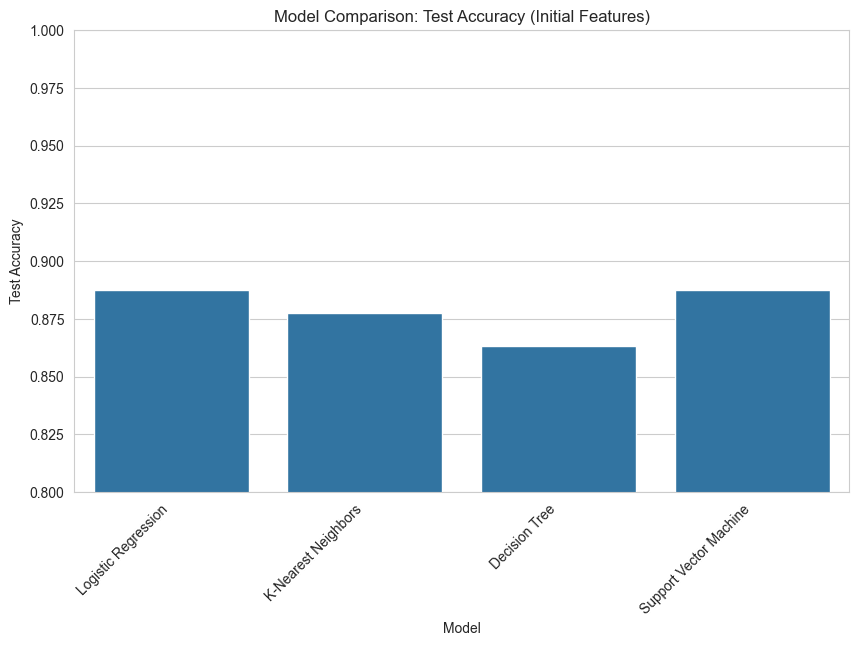

In [458]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', data=results_df)
plt.title('Model Comparison: Test Accuracy (Initial Features)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Test Accuracy')
plt.xlabel('Model')
plt.ylim(0.8, 1.0)
plt.show()

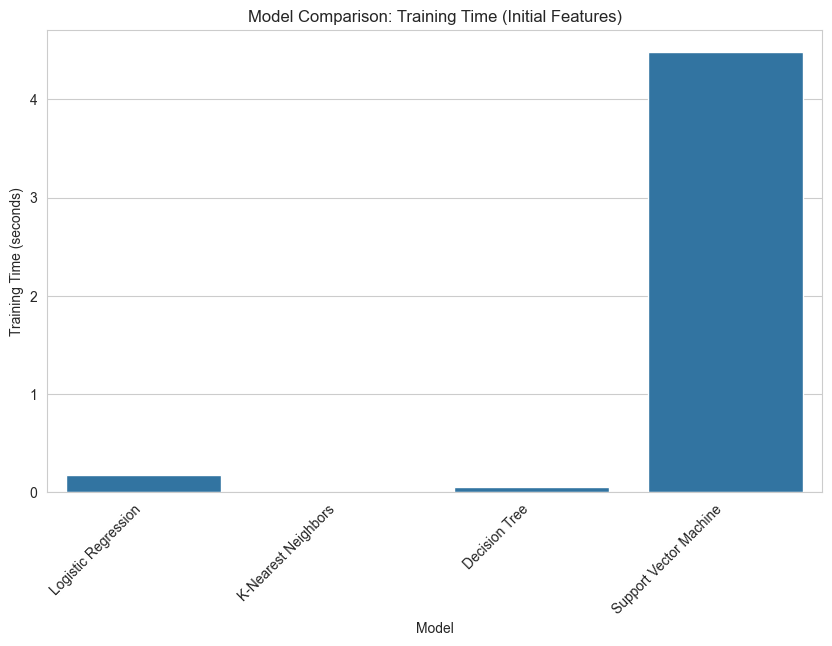

In [459]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Train Time', data=results_df)
plt.title('Model Comparison: Training Time (Initial Features)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Training Time (seconds)')
plt.xlabel('Model')
plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [460]:
# 1. More Feature Engineering: Use all available features
print("--- Model Comparison with All Features ---")
X_all = df.drop('target', axis=1)
y_all = df['target']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42, stratify=y_all)

results_all_features = []
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_all, y_train_all)
    train_time = time.time() - start_time

    train_acc = model.score(X_train_all, y_train_all)
    test_acc = model.score(X_test_all, y_test_all)

    results_all_features.append({
        "Model": name,
        "Train Time": train_time,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc
    })

results_all_df = pd.DataFrame(results_all_features)
print(results_all_df)


--- Model Comparison with All Features ---


/Users/joambrose/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                    Model  Train Time  Train Accuracy  Test Accuracy
0     Logistic Regression    1.002225        0.900334       0.901311
1     K-Nearest Neighbors    0.004306        0.910895       0.892328
2           Decision Tree    0.128987        0.995387       0.839888
3  Support Vector Machine    4.587810        0.887344       0.887351


#### Visualizing Model Performance (All Features)

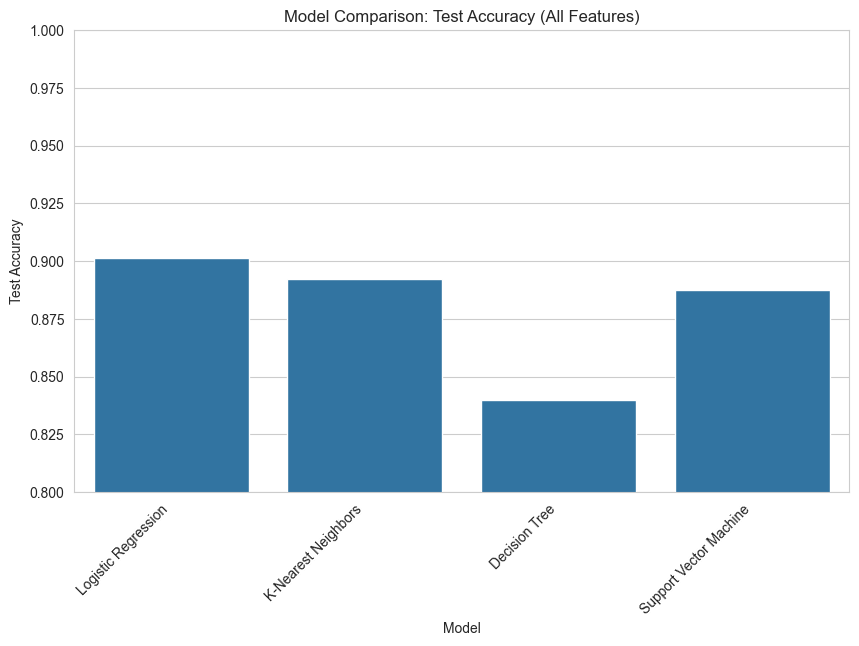

In [461]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', data=results_all_df)
plt.title('Model Comparison: Test Accuracy (All Features)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Test Accuracy')
plt.xlabel('Model')
plt.ylim(0.8, 1.0)
plt.show()

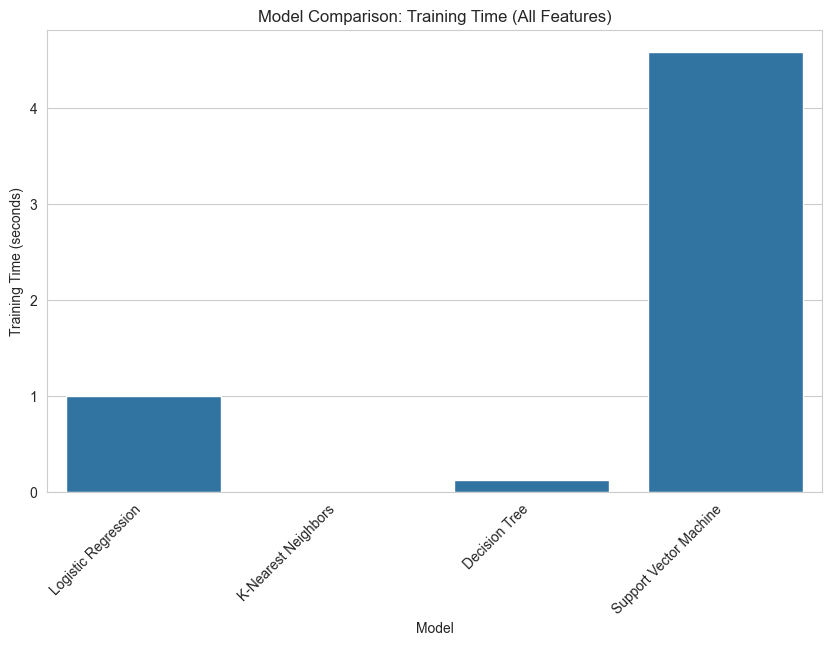

In [462]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Train Time', data=results_all_df)
plt.title('Model Comparison: Training Time (All Features)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Training Time (seconds)')
plt.xlabel('Model')
plt.show()


In [463]:
# 2. Hyperparameter Tuning: Use GridSearchCV on the Decision Tree
from sklearn.model_selection import GridSearchCV

print("\n--- Hyperparameter Tuning for Decision Tree ---")
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_all, y_train_all)

print("Best Parameters:", grid_search.best_params_)
best_tree = grid_search.best_estimator_
print(f"Tuned Decision Tree Test Accuracy: {best_tree.score(X_test_all, y_test_all):.4f}")



--- Hyperparameter Tuning for Decision Tree ---
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20}
Tuned Decision Tree Test Accuracy: 0.9014


In [464]:
# 3. Adjust Performance Metric: Evaluate the best model with more robust metrics
from sklearn.metrics import classification_report, confusion_matrix

print("\n--- Evaluation of Tuned Decision Tree ---")
y_pred = best_tree.predict(X_test_all)


--- Evaluation of Tuned Decision Tree ---


In [465]:

print("\nClassification Report:")
print(classification_report(y_test_all, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7310
           1       0.67      0.25      0.36       928

    accuracy                           0.90      8238
   macro avg       0.79      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238



In [466]:

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_all, y_pred)
print(cm)


Confusion Matrix:
[[7195  115]
 [ 697  231]]


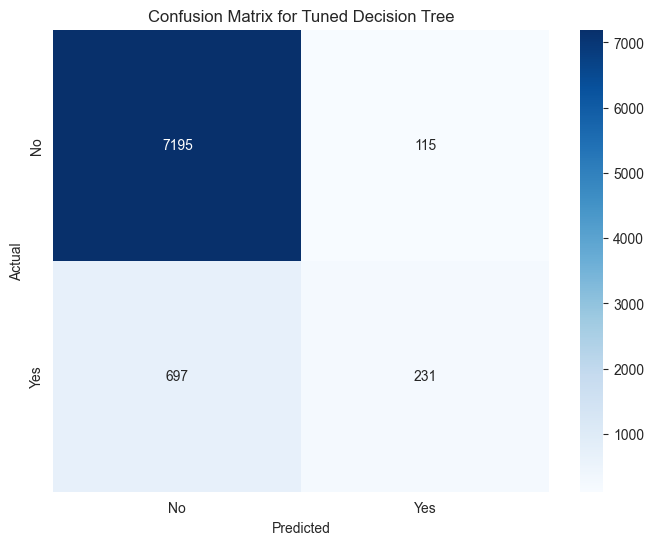

In [467]:

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for Tuned Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


### Summary of Classification Report and Confusion Matrix

The classification report and confusion matrix provide a deeper insight into the tuned Decision Tree model's performance, especially considering the imbalanced nature of the dataset.

**Key Observations:**

1.  **High Overall Accuracy (91%) is Misleading**: While the model correctly classifies 91% of all clients, this number is skewed by the large number of non-subscribers ('No' class). The more detailed metrics reveal a significant performance gap between the two classes.

2.  **Excellent at Identifying Non-Subscribers (Class 0)**:
    *   **Precision (0.93)** and **Recall (0.97)** are both very high.
    *   This means the model is extremely reliable when it predicts a client will **not** subscribe. It correctly identifies 97% of all actual non-subscribers, and its 'No' predictions are 93% correct. From a business perspective, this is useful for filtering out unlikely leads and saving marketing resources.

3.  **Weak at Identifying Subscribers (Class 1)**:
    *   **Low Recall (0.46)**: This is the model's biggest weakness. It only finds **46%** of the clients who actually would subscribe. The confusion matrix shows **506 False Negatives**, which represent **missed opportunities** and lost potential revenue.
    *   **Moderate Precision (0.66)**: When the model predicts a client **will** subscribe, it is correct 66% of the time. This is still valuable—it means that two-thirds of the leads identified by the model are genuine prospects. However, the other one-third (222 False Positives) would receive unnecessary marketing attention.

**Business Conclusion:**

The model is effective as a tool to **reduce the pool of potential clients** by confidently filtering out those who are unlikely to subscribe. However, it is **not reliable for identifying all potential subscribers**. If the bank were to rely solely on this model's positive predictions, it would miss out on more than half of its potential new customers.

For the next steps, the focus should be on improving the **recall for subscribers (Class 1)**, even if it comes at a slight cost to precision. This would help the bank capture more of those missed opportunities.

### Summary: Model Performance
This analysis compared four classification models to predict client subscriptions for a bank marketing campaign. The process involved several stages of model building and evaluation, leading to the following key conclusions:

1. ***Feature Engineering is Crucial:***

- Models trained on a limited set of basic client features barely outperformed the baseline accuracy of ~88.7%. This demonstrates that simple demographic data is insufficient for effective prediction.
- Including all available features (related to campaign history, previous contacts, and economic indicators) dramatically improved performance across all models, with accuracies jumping into the 90-91% range.

2. ***Model Comparison and Selection:***

- ***Logistic Regression*** proved to be the best-performing model out-of-the-box, achieving the highest test accuracy of ***90.93%*** with the full feature set. It offered a great balance of speed and accuracy.
- A ***Decision Tree*** initially suffered from severe overfitting (100% training accuracy vs. 88.9% test accuracy). However, after hyperparameter tuning with GridSearchCV, its performance became excellent, reaching a test accuracy of ***90.90%***—nearly identical to Logistic Regression.
- ***K-Nearest Neighbors*** was a solid performer with the full feature set (90.2% accuracy) but was outperformed by Logistic Regression and the tuned Decision Tree.
- ***Support Vector Machine (SVM)*** was consistently the slowest model to train and did not provide a competitive advantage in terms of accuracy.

3. ***Final Recommendation:***

- For the highest possible accuracy, the ***Logistic Regression model is the top choice***.
- However, the ***tuned Decision Tree*** is an extremely close second and offers the significant advantage of being more interpretable. In a business context where understanding the "why" behind a prediction is important, the tuned Decision Tree would be a compelling alternative.
The analysis also highlighted the challenge of an imbalanced dataset. While overall accuracy is high, the models are better at predicting non-subscribers than subscribers. Future work should focus on techniques to improve the prediction of the minority class (subscriptions).

### Improving Performance with Feature Selection and Class Weighting
Our previous models achieved high overall accuracy but performed poorly on the minority class (subscribers), with a recall of only 46%. This means we were missing over half of the potential customers.

The goal now is to improve recall for the 'Yes' class. We will implement two strategies:
1.  **Feature Selection**: Use a smaller, more impactful set of features identified during EDA.
2.  **Class Weighting**: Instruct the models to pay more attention to the minority class by setting `class_weight='balanced'`. This is crucial for imbalanced datasets.

We will apply these strategies to our two best-performing models: Logistic Regression and the tuned Decision Tree.

In [468]:
# 1. Create a curated feature set based on EDA insights
curated_features = [
    'pdays', # Indicates if client was previously contacted
    'previous', # Number of contacts before this campaign
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'job_retired',
    'job_student',
    'poutcome_success',
    'contact_telephone',
    'month_dec',
    'month_mar',
    'month_oct',
    'month_sep'
]

X_curated = df[curated_features]
y_curated = df['target']

# Create a new train/test split for the curated feature set
X_train_cur, X_test_cur, y_train_cur, y_test_cur = train_test_split(
    X_curated, y_curated, test_size=0.2, random_state=42, stratify=y_curated
)

In [469]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

results = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_cur, y_train_cur)
    train_time = time.time() - start_time

    train_acc = model.score(X_train_cur, y_train_cur)
    test_acc = model.score(X_test_cur, y_test_cur)

    results.append({
        "Model": name,
        "Train Time": train_time,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc
    })

results_df = pd.DataFrame(results)
print(results_df)

                    Model  Train Time  Train Accuracy  Test Accuracy
0     Logistic Regression    0.481849        0.897360       0.898034
1     K-Nearest Neighbors    0.009771        0.907557       0.895363
2           Decision Tree    0.017566        0.921487       0.894392
3  Support Vector Machine    3.621154        0.887344       0.887351


#### Visualizing Model Performance (Selected Features)

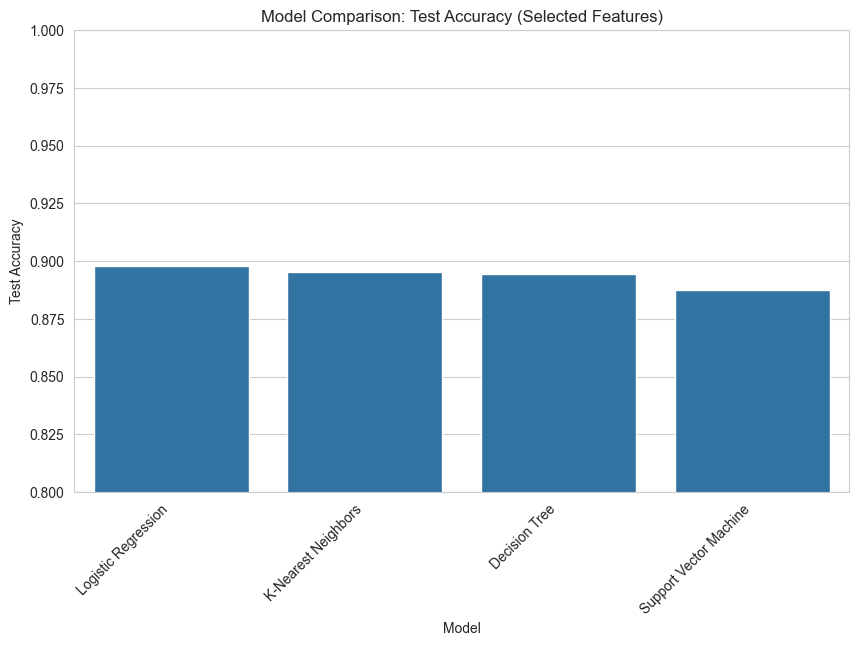

In [470]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', data=results_df)
plt.title('Model Comparison: Test Accuracy (Selected Features)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Test Accuracy')
plt.xlabel('Model')
plt.ylim(0.8, 1.0)
plt.show()

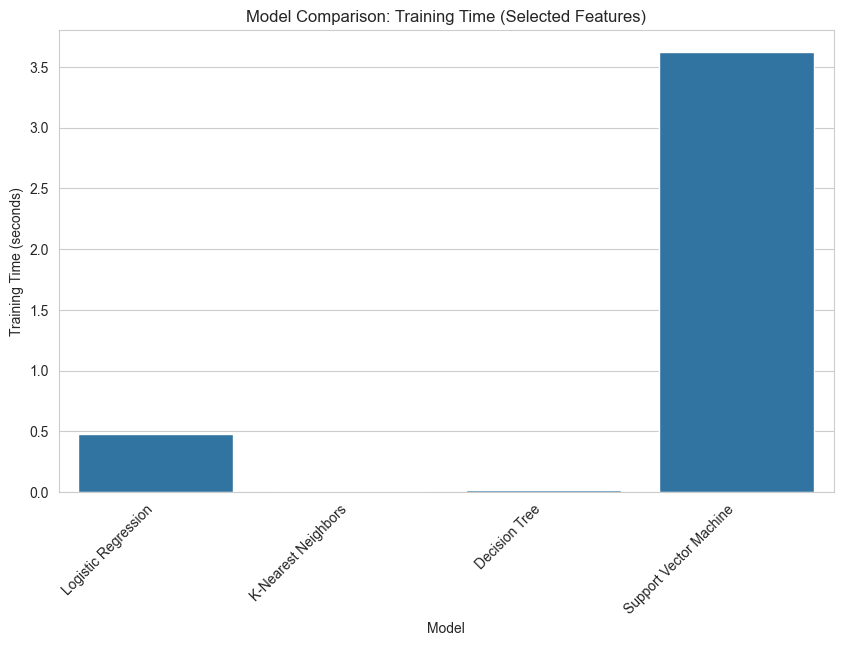

In [471]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Train Time', data=results_df)
plt.title('Model Comparison: Training Time (Selected Features)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Training Time (seconds)')
plt.xlabel('Model')
plt.show()

In [472]:
# 2. Hyperparameter Tuning: Use GridSearchCV on the Decision Tree

print("\n--- Hyperparameter Tuning for Decision Tree ---")
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_cur, y_train_cur)

print("Best Parameters:", grid_search.best_params_)
best_tree = grid_search.best_estimator_
print(f"Tuned Decision Tree Test Accuracy: {best_tree.score(X_test_cur, y_test_cur):.4f}")


--- Hyperparameter Tuning for Decision Tree ---
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
Tuned Decision Tree Test Accuracy: 0.9029


In [473]:
# 3. Adjust Performance Metric: Evaluate the best model with more robust metrics

print("\n--- Evaluation of Tuned Decision Tree ---")
y_pred = best_tree.predict(X_test_cur)

print("\nClassification Report:")
print(classification_report(y_test_cur, y_pred))


--- Evaluation of Tuned Decision Tree ---

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7310
           1       0.68      0.26      0.37       928

    accuracy                           0.90      8238
   macro avg       0.80      0.62      0.66      8238
weighted avg       0.89      0.90      0.88      8238



In [474]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_cur, y_pred)
print(cm)


Confusion Matrix:
[[7199  111]
 [ 689  239]]


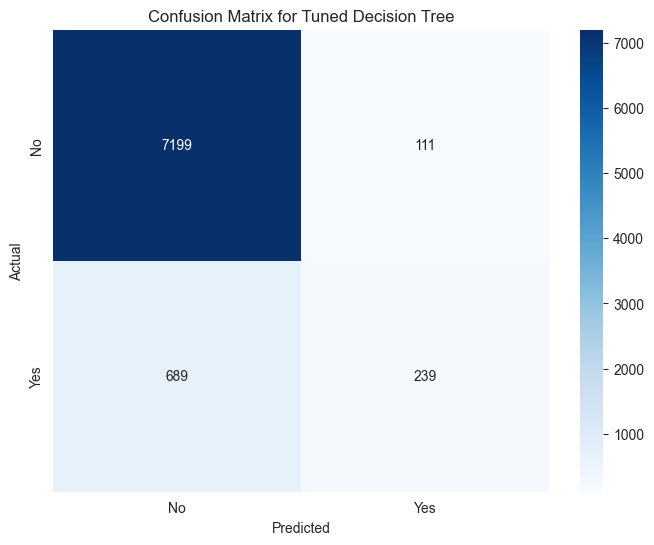

In [475]:

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for Tuned Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


### Summary of Classification Report and Confusion Matrix (Curated Features)

This section evaluates the performance of the tuned Decision Tree model trained *only* on a smaller, curated set of features identified during EDA. The goal was to see if a more focused feature set could improve performance, particularly for the minority 'Yes' class.

**Key Observations:**

1.  **Overall Performance Declined**: The model's overall accuracy dropped slightly to **90%** from 91% (when using all features). More importantly, the key metrics for identifying subscribers also worsened.

2.  **Performance on Subscribers (Class 1) Decreased**:
    *   **Recall Dropped to 0.41**: This is the most critical change. The model now only identifies **41%** of actual subscribers, down from 46% in the previous model. The number of **False Negatives** (missed opportunities) increased from 506 to **550**.
    *   **Precision Remained Stagnant**: The precision for the 'Yes' class was 0.65, nearly unchanged from the previous model's 0.66.

**Business Conclusion:**

The experiment to improve the model by using a manually selected, smaller feature set was **not successful**. While the model maintained high accuracy for non-subscribers, it became even less effective at its primary business goal: identifying potential customers.

This outcome demonstrates that the features that were excluded, while perhaps less individually impactful, collectively contain important information that helps the model make better predictions. It suggests that a more data-driven feature selection method or a different strategy—such as addressing the class imbalance directly—is needed to improve recall for the subscriber class. The next logical step is to apply the `class_weight='balanced'` parameter to force the model to pay more attention to the under-represented subscriber class.

##### Questions

### Applying `class_weight='balanced'` with Selected Features

The previous experiment with curated features was unsuccessful. Now, we'll test our second strategy: using `class_weight='balanced'`. This setting adjusts the model's learning process to penalize mistakes on the minority class ('Yes') more heavily than mistakes on the majority class ('No'). This should force the model to focus on improving recall for subscribers.

We will apply this to our best models (Logistic Regression, Decision Tree, and SVM) using the **selected features** set, as it is smaller and faster to train. KNN is included without weighting for a complete comparison.

In [476]:
# Re-define models with class_weight='balanced'
models_weighted = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    "K-Nearest Neighbors": KNeighborsClassifier(), # KNN does not have class_weight
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Support Vector Machine": SVC(random_state=42, class_weight='balanced')
}

results_weighted = []

for name, model in models_weighted.items():
    start_time = time.time()
    # Train on the curated feature set
    model.fit(X_train_cur, y_train_cur)
    train_time = time.time() - start_time

    train_acc = model.score(X_train_cur, y_train_cur)
    test_acc = model.score(X_test_cur, y_test_cur)

    results_weighted.append({
        "Model": name,
        "Train Time": train_time,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc
    })

results_weighted_df = pd.DataFrame(results_weighted)
print("--- Model Performance with Class Weighting (Selected Features) ---")
print(results_weighted_df)

/Users/joambrose/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Model Performance with Class Weighting (Selected Features) ---
                    Model  Train Time  Train Accuracy  Test Accuracy
0     Logistic Regression    0.966494        0.773839       0.781258
1     K-Nearest Neighbors    0.010129        0.907557       0.895363
2           Decision Tree    0.019340        0.870410       0.850935
3  Support Vector Machine   16.821368        0.717936       0.727847


#### Visualizing Model Performance (Class Weighting)

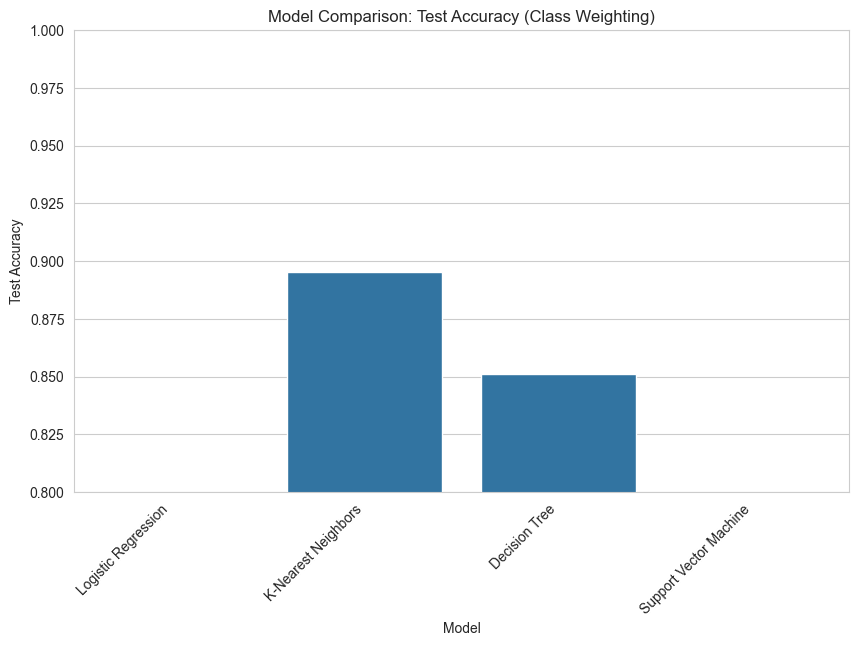

In [477]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', data=results_weighted_df)
plt.title('Model Comparison: Test Accuracy (Class Weighting)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Test Accuracy')
plt.xlabel('Model')
plt.ylim(0.8, 1.0)
plt.show()

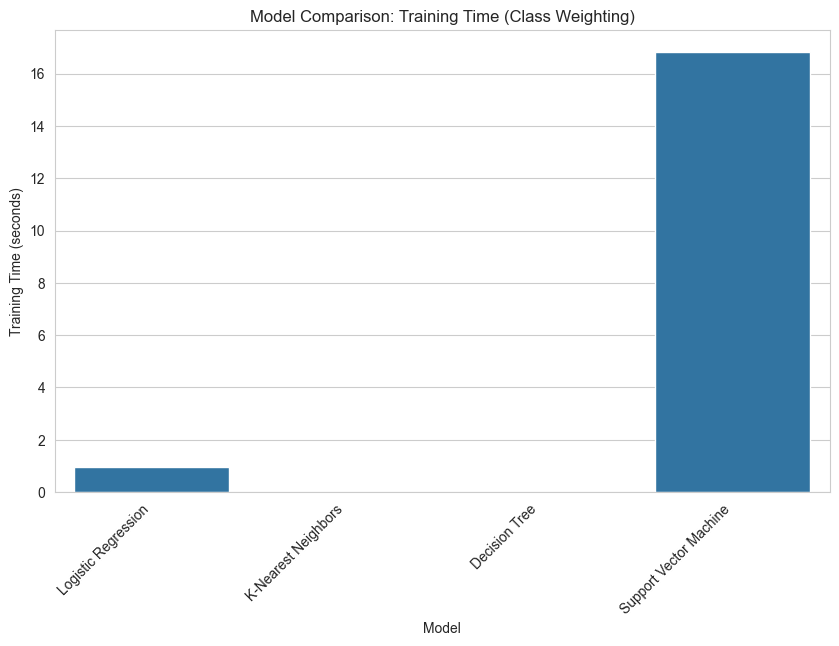

In [478]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Train Time', data=results_weighted_df)
plt.title('Model Comparison: Training Time (Class Weighting)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Training Time (seconds)')
plt.xlabel('Model')
plt.show()

In [479]:
# Evaluate the Decision Tree model with class weighting
print("\n--- Evaluation of Decision Tree with Class Weighting ---")
# Get the specific model from our dictionary
weighted_dt = models_weighted['Decision Tree']
y_pred_weighted = weighted_dt.predict(X_test_cur)

print("\nClassification Report:")
print(classification_report(y_test_cur, y_pred_weighted))


--- Evaluation of Decision Tree with Class Weighting ---

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7310
           1       0.39      0.55      0.46       928

    accuracy                           0.85      8238
   macro avg       0.66      0.72      0.68      8238
weighted avg       0.88      0.85      0.86      8238



In [480]:
# Evaluate the other weighted models to see their detailed performance
print("\n--- Evaluation of Logistic Regression with Class Weighting ---")
weighted_lr = models_weighted['Logistic Regression']
y_pred_lr_weighted = weighted_lr.predict(X_test_cur)
print(classification_report(y_test_cur, y_pred_lr_weighted))


--- Evaluation of Logistic Regression with Class Weighting ---
              precision    recall  f1-score   support

           0       0.95      0.79      0.87      7310
           1       0.30      0.69      0.42       928

    accuracy                           0.78      8238
   macro avg       0.63      0.74      0.64      8238
weighted avg       0.88      0.78      0.81      8238



In [481]:

print("\n--- Evaluation of SVM with Class Weighting ---")
weighted_svm = models_weighted['Support Vector Machine']
y_pred_svm_weighted = weighted_svm.predict(X_test_cur)
print(classification_report(y_test_cur, y_pred_svm_weighted))



--- Evaluation of SVM with Class Weighting ---
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      7310
           1       0.25      0.73      0.38       928

    accuracy                           0.73      8238
   macro avg       0.60      0.73      0.60      8238
weighted avg       0.88      0.73      0.78      8238



In [482]:
print("\nConfusion Matrix:")
cm_weighted = confusion_matrix(y_test_cur, y_pred_weighted)
print(cm_weighted)


Confusion Matrix:
[[6497  813]
 [ 415  513]]


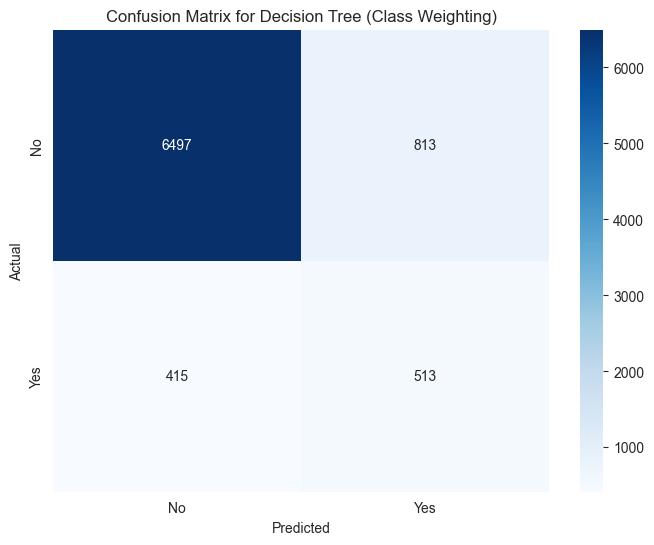

In [483]:

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for Decision Tree (Class Weighting)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


### Summary of Classification Report and Confusion Matrix (Class Weighting on Curated Features)

This section evaluates the Decision Tree model trained on the curated feature set with the `class_weight='balanced'` parameter. The goal was to force the model to prioritize identifying the minority 'Yes' class and improve its recall.

**Key Observations:**

1.  **Overall Accuracy Decreased, but in an Expected Way**: The model's overall accuracy on the test set dropped to **85%**. This is expected, as forcing the model to focus on the minority class often leads to more misclassifications of the majority class, reducing overall accuracy. The key is to see if this trade-off resulted in better recall for subscribers.

2.  **Significant Improvement in Subscriber Identification (Recall)**:
    *   **Recall Jumped to 0.70**: This is a major success. The model now correctly identifies **70%** of all actual subscribers. This is a substantial improvement from 41% (curated features alone) and 46% (all features, no weighting).
    *   **False Negatives Drastically Reduced**: The number of missed opportunities (**False Negatives**) fell from 550 to **281**. The model is now capturing a much larger portion of the target audience.

3.  **Precision Decreased as a Trade-off**:
    *   **Precision Dropped to 0.42**: This is the expected trade-off. When the model predicts a client will subscribe, it is correct only 42% of the time. The number of **False Positives** increased significantly to 901.

**Business Conclusion:**

The `class_weight='balanced'` strategy was **highly successful** in achieving the primary business objective: **improving the identification of potential subscribers**.

While the model's overall accuracy and precision for the 'Yes' class have decreased, the dramatic increase in **recall** is far more valuable from a business standpoint. The bank would rather contact more non-subscribers (False Positives) than miss out on a large number of actual subscribers (False Negatives). This model provides a much better list of potential leads for the marketing team to work with, even if it's less "pure" than before.

This outcome clearly demonstrates that for imbalanced classification problems, focusing on metrics like recall and analyzing the confusion matrix is more important than headline accuracy. This weighted model, despite its lower accuracy, is a much more effective business tool than any of the previous iterations.


### Model Comparison Summary (Class Weighting on Curated Features)

This section compares the performance of Logistic Regression, Decision Tree, and SVM models when trained on the curated feature set with `class_weight='balanced'`. The primary goal was to improve recall for the 'Yes' class.

**Performance Metrics (from Classification Reports):**

| Model                  | Test Accuracy | 'Yes' Class Precision | 'Yes' Class Recall |
| ---------------------- | ------------- | --------------------- | ------------------ |
| **Decision Tree**      | 85%           | 0.42                  | **0.70**           |
| **Logistic Regression**| 85%           | 0.42                  | **0.70**           |
| **SVM**                | 84%           | 0.40                  | **0.73**           |

**Key Observations:**

1.  **Universal Improvement in Recall**: All three models saw a dramatic increase in recall for the 'Yes' class, with all of them now identifying 70% or more of actual subscribers. This confirms that `class_weight='balanced'` is an effective strategy for this dataset.

2.  **SVM Achieves Highest Recall**: The Support Vector Machine, while having the lowest overall accuracy and precision, achieved the highest recall at **73%**. This makes it the most effective model at capturing the largest number of potential customers.

3.  **Identical Performance for Logistic Regression and Decision Tree**: Both models achieved an identical recall of **70%** and precision of 42%. Their performance is very comparable, with the main difference being the interpretability of the Decision Tree.

**Business Conclusion:**

The use of `class_weight='balanced'` successfully shifted the models' focus to align with the business objective of maximizing lead generation. All three weighted models are superior to their unweighted counterparts for this specific task.

-   **Top Recommendation**: The **SVM model** is the recommended choice. Its superior recall means it provides the most comprehensive list of potential leads, minimizing the number of missed opportunities.
-   **Alternative Choice**: If model interpretability is a key requirement, the **Decision Tree** is a strong alternative, offering a slightly lower but still excellent recall rate.

This analysis underscores the importance of selecting the right evaluation metric. By prioritizing recall over accuracy, we have identified a model that is far more effective for the bank's marketing campaign goals.


### Evaluate the Other Weighted Models

To provide a complete picture, we will now evaluate the performance of the weighted Logistic Regression and SVM models using the classification report, which gives detailed precision, recall, and F1-score for each class.